In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import roc_curve

# Helper methods

In [2]:
def save(path):
    plt.savefig('../../images' + path)
    
def loadDataSet():
#     df  = pd.read_csv("../input/stroke-dataset/stroke_subset.csv")
    return pd.read_csv("../input/stroke-dataset/stroke.csv")

In [3]:


df=loadDataSet();
df = df.drop('id',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


# Data Exploration

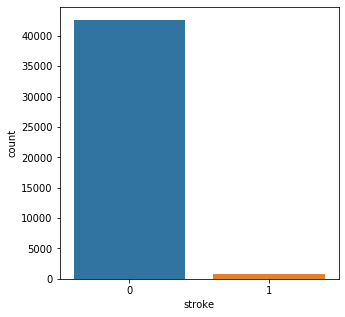

In [4]:
plt.figure(figsize=(5,5))
sns.countplot(x='stroke',data=df)
save('/building_ann/stroke_countplot.png')

In [5]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


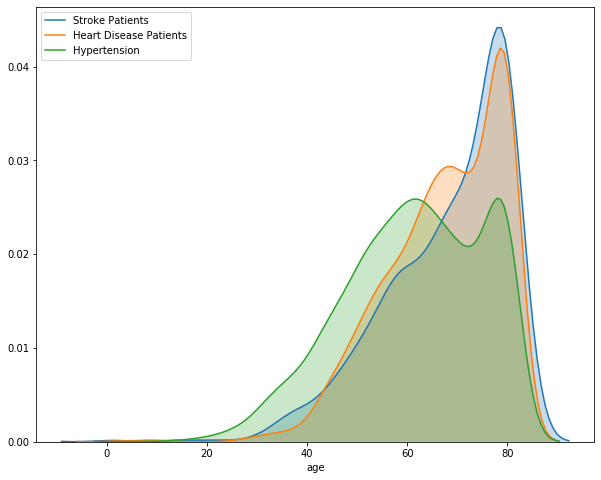

In [6]:
plt.figure(figsize=(10,8))
sns.distplot(df.loc[df['stroke'] == 1]['age'], label='Stroke Patients', kde_kws={"shade": True},hist=False, bins =20)
sns.distplot(df.loc[df['heart_disease'] == 1]['age'], label='Heart Disease Patients', kde_kws={"shade": True},hist=False, bins =20)
sns.distplot(df.loc[df['hypertension'] == 1]['age'], label='Hypertension', kde_kws={"shade": True},hist=False, bins =20)
plt.legend()
save('/building_ann/stroke_age_distplot.png')

In [7]:
df['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [8]:
df.iloc[95]


gender                          Male
age                               34
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             106.23
bmi                              NaN
smoking_status       formerly smoked
stroke                             0
Name: 95, dtype: object

In [9]:
# def fill_smoking_status(smoking_status):
#     if pd.isnull(smoking_status):
#         return np.nan
#     elif smoking_status=='never smoked':
#         return 0
#     elif smoking_status=='formerly smoked':
#         return 1
#     else: 
#         return 3
# df['smoking_status'] = df.apply(lambda x : fill_smoking_status(x['smoking_status']), axis=1)



# plt.figure(figsize=(9,9))
# sns.heatmap(df.corr(),annot=True,cmap='viridis')
# plt.ylim(9, 0)
# # plt.xlim(0, 1)

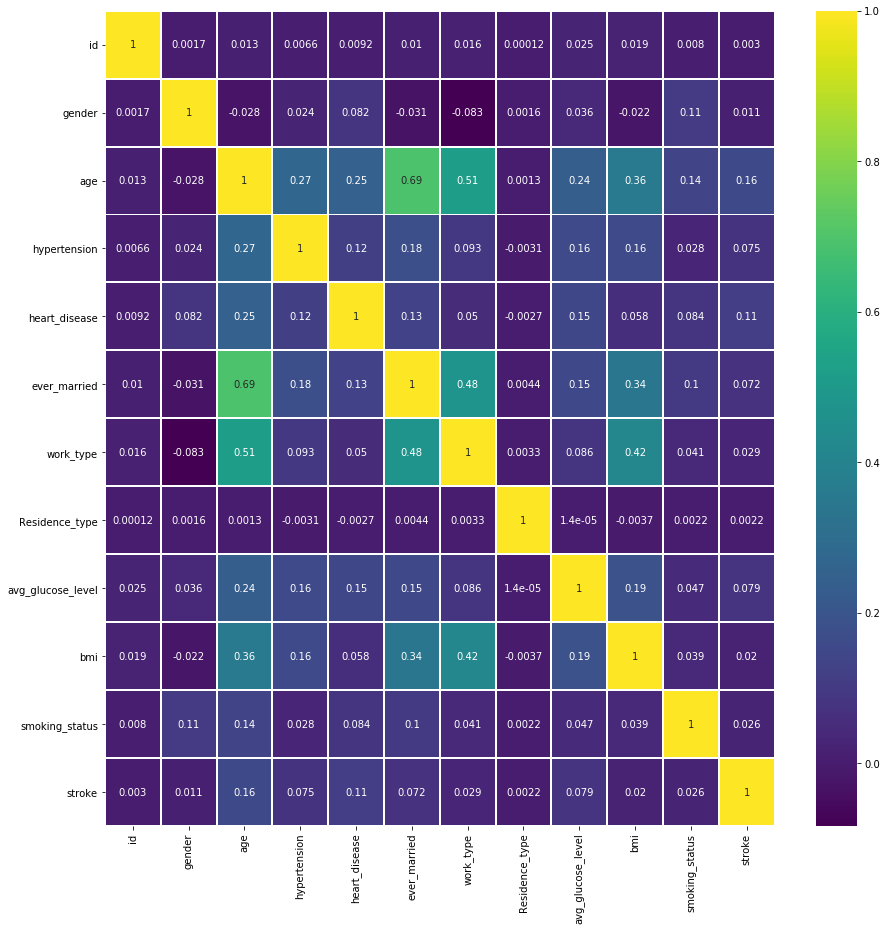

In [10]:
def map_smoking_status(smoking_status):
    if pd.isnull(smoking_status):
        return np.nan
    elif smoking_status=='never smoked':
        return 0
    elif smoking_status=='formerly smoked':
        return 1
    else: 
        return 1
def fill_work_type(work_type):
    if work_type == 'children':
        return 0
    elif work_type == 'Never_worked':
        return 1
    elif work_type == 'Self-employed':
        return 2
    elif work_type == 'Private':
        return 3
    else: 
        return 4
df_hm = loadDataSet()
df_hm['smoking_status'] = df_hm.apply(lambda x : map_smoking_status(x['smoking_status']), axis=1)
df_hm['ever_married'] = df_hm.apply(lambda x : 1 if x['ever_married']=='Yes' else 0, axis =1)
df_hm['Residence_type'] = df_hm.apply(lambda x : 1 if x['Residence_type']=='Urban' else 0, axis =1)
df_hm['work_type'] = df_hm.apply(lambda x : fill_work_type(x['work_type']), axis =1)
df_hm['gender'] = df_hm.apply(lambda x : 1 if x['gender']=='Male' else 0, axis =1)

plt.figure(figsize=(15,15))
sns.heatmap(df_hm.corr(),annot=True,cmap='viridis', linewidth=1)
plt.ylim(12, 0)
save('/building_ann/heatmap.png')

In [11]:
# plt.figure(figsize=(25,25))
# sns.pairplot(df_hm)
# save('/building_ann/pairplot.png')

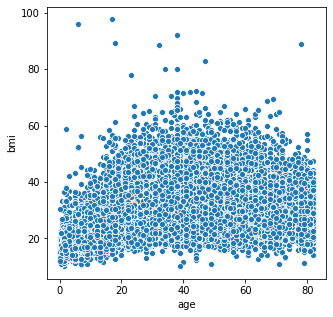

In [12]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='age',y='bmi',data=df)
save('/building_ann/age_bmi_scatterplot.png')

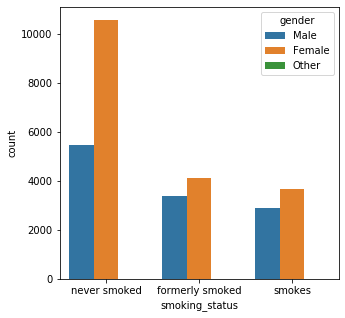

In [13]:
plt.figure(figsize=(5,5))
df = loadDataSet()
sns.countplot(x='smoking_status',data=df,hue='gender')
save('/building_ann/smoking_scatterplot.png')

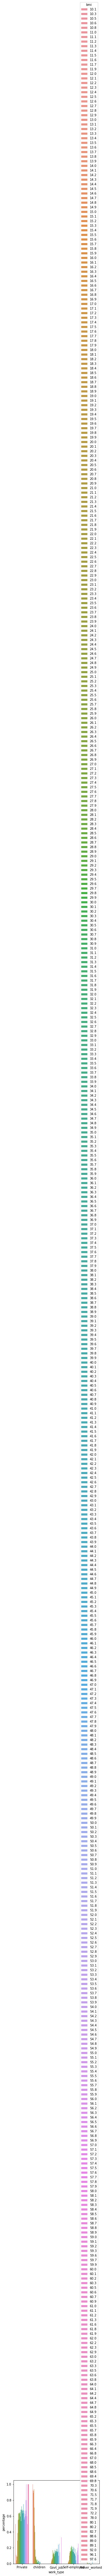

In [14]:
# Adapted code from: https://github.com/mwaskom/seaborn/issues/1027
plt.figure(figsize=(5,5))
df = loadDataSet()
x, y, hue = "work_type", "percentage", "bmi"
# hue_order = ["Male", "Female"]

#f, axes = plt.subplots(1, 2)
# sns.countplot(x=x, hue=hue, data=df, ax=axes[0])
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)#, ax=axes[1])
save('/building_ann/gender_smoking_percentage.png')

In [15]:
len(df[df['stroke'] == 1 ])/len(df)

0.01804147465437788

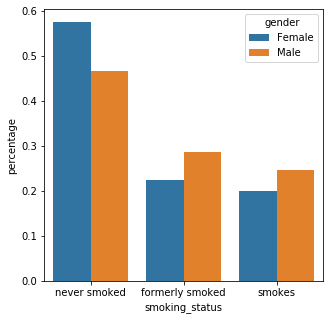

In [16]:
# Adapted code from: https://github.com/mwaskom/seaborn/issues/1027
plt.figure(figsize=(5,5))
df = loadDataSet()
genderOther = df[ df['gender'] == 'Other' ].index
df.drop(genderOther , inplace=True)
x, y, hue = "smoking_status", "percentage", "gender"
# hue_order = ["Male", "Female"]

#f, axes = plt.subplots(1, 2)
# sns.countplot(x=x, hue=hue, data=df, ax=axes[0])
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)#, ax=axes[1])
save('/building_ann/gender_smoking_percentage.png')

In [17]:

stroke_y = df[df['stroke'] == 1 ].groupby("smoking_status").count()['stroke']
stroke_n = df[df['stroke'] == 0 ].groupby("smoking_status").count()['stroke']
print(stroke_y/(stroke_y + stroke_n))

smoking_status
formerly smoked    0.029518
never smoked       0.017694
smokes             0.020271
Name: stroke, dtype: float64


In [18]:
df.groupby("smoking_status")['stroke'].value_counts(normalize=True)

smoking_status   stroke
formerly smoked  0         0.970482
                 1         0.029518
never smoked     0         0.982306
                 1         0.017694
smokes           0         0.979729
                 1         0.020271
Name: stroke, dtype: float64

In [19]:
np.bincount(df.apply(lambda x : 1 if x['gender']=='Male' else 0, axis =1))

array([25665, 17724], dtype=int64)

In [20]:
np.bincount(df['stroke'])

array([42606,   783], dtype=int64)

In [21]:
# def fill_smoking_status(smoking_status, isMale):
#     if smoking_status=='never smoked':
#         return 0
#     else: 
#         return isMale if pd.isnull(smoking_status) else 1
# df['smoking_status'] = df.apply(lambda x : fill_smoking_status(x['smoking_status'], x['Male']), axis=1)



# plt.figure(figsize=(9,9))
# sns.heatmap(df.corr(),annot=True,cmap='viridis')
# plt.ylim(9, 0)
# # plt.xlim(0, 1)

# Missing Data

In [22]:
df.isnull().sum()/len(df)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.033603
smoking_status       0.306299
stroke               0.000000
dtype: float64

In [23]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [24]:
df = loadDataSet()
neg, pos = np.bincount(df['stroke'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 43400
    Positive: 783 (1.80% of total)



In [25]:
def fill_smoking_status(smoking_status, work_type, gender, age):
    if not pd.isnull(smoking_status):
        return smoking_status
    if work_type=='children' or gender =='Female' or age<18:
        return 'never smoked'
    return 'smokes'

df['smoking_status'] = df.apply(lambda x : fill_smoking_status(x['smoking_status'], x['work_type'], x['gender'], x['age']), axis=1)
smoking_dummies = pd.get_dummies(df['smoking_status'],drop_first=True)
df = pd.concat([df.drop('smoking_status',axis=1),smoking_dummies],axis=1)

df['gender'] = df['gender'].replace(["Other"], "Male")
gender_dummies = pd.get_dummies(df['gender'],drop_first=True)
df = pd.concat([df.drop('gender',axis=1),gender_dummies],axis=1)

bmi_avg= df.groupby('work_type').mean()['bmi']
df['bmi'] = df.apply(lambda x : bmi_avg[x['work_type']] if np.isnan(x['bmi']) else x['bmi'], axis =1)


work_type_dummies = pd.get_dummies(df['work_type'],drop_first=True)
df = pd.concat([df.drop('work_type',axis=1),work_type_dummies],axis=1)

married_dummies = pd.get_dummies(df['ever_married'],drop_first=True)
df = pd.concat([df.drop('ever_married',axis=1),married_dummies],axis=1)
df = df.rename(columns={'Yes': 'Married'})

residence_dummies = pd.get_dummies(df['Residence_type'],drop_first=True)
df = pd.concat([df.drop('Residence_type',axis=1),residence_dummies],axis=1)

df = df.drop('id',axis=1)


df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,never smoked,smokes,Male,Never_worked,Private,Self-employed,children,Married,Urban
0,3.0,0,0,95.12,18.0,0,1,0,1,0,0,0,1,0,0
1,58.0,1,0,87.96,39.2,0,1,0,1,0,1,0,0,1,1
2,8.0,0,0,110.89,17.6,0,1,0,0,0,1,0,0,0,1
3,70.0,0,0,69.04,35.9,0,0,0,0,0,1,0,0,1,0
4,14.0,0,0,161.28,19.1,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0,1,0,0,0,0,0,1,0,1
43396,56.0,0,0,213.61,55.4,0,0,0,0,0,0,0,0,1,1
43397,82.0,1,0,91.94,28.9,0,0,0,0,0,1,0,0,1,1
43398,40.0,0,0,99.16,33.2,0,1,0,1,0,1,0,0,1,1


In [26]:

df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
never smoked         0
smokes               0
Male                 0
Never_worked         0
Private              0
Self-employed        0
children             0
Married              0
Urban                0
dtype: int64

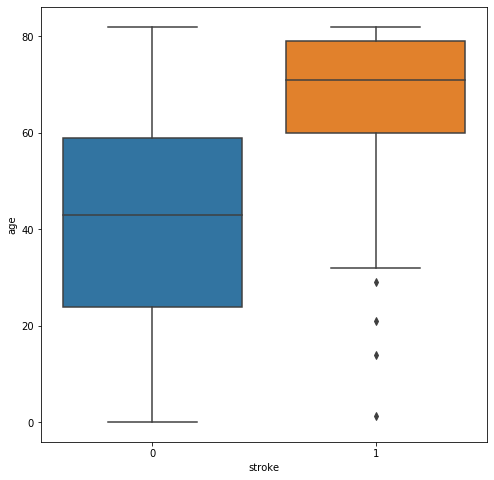

In [27]:
plt.figure(figsize=(8,8))
sns.boxplot(x='stroke',y='age',data=df)

In [28]:
# # sorted(df['smoking_status'].unique())
# plt.figure(figsize=(10,10))
# sns.countplot(x='stroke',data=df,hue='smoking_status')

In [29]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,never smoked,smokes,Male,Never_worked,Private,Self-employed,children,Married,Urban
age,1.000000,0.272169,0.250188,0.237627,0.359555,0.156049,-0.289450,0.118157,-0.027768,-0.069509,0.143657,0.326913,-0.641240,0.693070,0.001299
hypertension,0.272169,1.000000,0.119777,0.160211,0.158361,0.075332,-0.073422,0.021051,0.023902,-0.019319,0.007236,0.100243,-0.130171,0.176575,-0.003124
heart_disease,0.250188,0.119777,1.000000,0.146938,0.058548,0.113763,-0.111078,0.054971,0.082270,-0.014292,-0.006327,0.099342,-0.089559,0.128833,-0.002743
avg_glucose_level,0.237627,0.160211,0.146938,1.000000,0.188248,0.078917,-0.081701,0.027844,0.035695,-0.014516,0.008048,0.080246,-0.114174,0.153607,0.000014
bmi,0.359555,0.158361,0.058548,0.188248,1.000000,0.022308,-0.175925,0.096763,-0.020754,-0.021918,0.203401,0.084054,-0.462608,0.342836,-0.003619
stroke,0.156049,0.075332,0.113763,0.078917,0.022308,1.000000,-0.043833,0.015820,0.011281,-0.008674,-0.002464,0.061195,-0.054115,0.071920,0.002247
never smoked,-0.289450,-0.073422,-0.111078,-0.081701,-0.175925,-0.043833,1.000000,-0.658491,-0.210051,0.033258,-0.128436,-0.082699,0.309063,-0.242106,-0.000919
smokes,0.118157,0.021051,0.054971,0.027844,0.096763,0.015820,-0.658491,1.000000,0.212961,-0.020449,0.113459,0.022885,-0.212152,0.128735,0.005024
Male,-0.027768,0.023902,0.082270,0.035695,-0.020754,0.011281,-0.210051,0.212961,1.000000,0.002700,-0.052028,-0.002953,0.089127,-0.031183,0.001558
Never_worked,-0.069509,-0.019319,-0.014292,-0.014516,-0.021918,-0.008674,0.033258,-0.020449,0.002700,1.000000,-0.074011,-0.027566,-0.026017,-0.080734,0.003089


In [30]:
df.isnull().sum()
df[np.isnan(df['bmi'])]

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,never smoked,smokes,Male,Never_worked,Private,Self-employed,children,Married,Urban


In [31]:
# plt.figure(figsize=(17,8))
# age_len = age_1/age_0
# age_len.plot(kind = 'bar')

In [32]:
# part of this code is taken from https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
def plot_cm(labels, predictions, model_name, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.ylim(2, 0)
  save('/building_ann/confusion_matrix_' + model_name + '.png')
  print('True Negatives: ', cm[0][0])
  print('False Positives: ', cm[0][1])
  print('False Negatives: ', cm[1][0])
  print('True Positives: ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

def plot_model_results(model_name, model):
    predictions = model.predict_classes(X_test)
    print(classification_report(y_test,predictions))
    losses = pd.DataFrame(model.history.history)
    losses[['loss','val_loss']].plot() 
    plt.ylabel('Cost')
    plt.xlabel('Epochs')
    save('/building_ann/val_loss_' + model_name + '.png')
    plot_cm(y_test,predictions, model_name) 

## Split Data

In [33]:
from sklearn.model_selection import train_test_split
df=df.sample(frac=1)

In [34]:
X = df.drop('stroke', axis =1).values
X

array([[46.,  0.,  0., ...,  0.,  1.,  0.],
       [38.,  0.,  0., ...,  0.,  0.,  0.],
       [34.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [31.,  0.,  0., ...,  0.,  0.,  0.],
       [ 9.,  0.,  0., ...,  1.,  0.,  0.],
       [56.,  0.,  1., ...,  0.,  1.,  1.]])

In [35]:
y = df['stroke'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from datetime import datetime
from tensorflow import keras
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]


time = datetime.now().strftime("%Y-%m-%d--%H%M")
logdir = 'logs\\hparam_tuning'
# board = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images = True, 
#                     update_freq='epoch', profile_batch=2, embeddings_freq=1)

In [39]:
def create_model(model_name, class_weight):
    model = Sequential()
    model.add(Dense(30,  activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(15,  activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=METRICS )

    model.fit(x=X_train, 
              y=y_train, 
              epochs=200,
              class_weight=class_weight,
              batch_size=2048,
              validation_data=(X_test, y_test), 
              verbose=1,
              callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)]
              )
    plot_model_results(model_name,model)

Train on 34720 samples, validate on 8680 samples
Epoch 1/200
34720/34720 [==============================] - 5s 139us/sample - loss: 0.5495 - tp: 78.0000 - fp: 4788.0000 - tn: 29289.0000 - fn: 565.0000 - accuracy: 0.8458 - precision: 0.0160 - recall: 0.1213 - auc: 0.4706 - val_loss: 0.4436 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8540.0000 - val_fn: 140.0000 - val_accuracy: 0.9839 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3788
Epoch 2/200
34720/34720 [==============================] - 0s 8us/sample - loss: 0.3751 - tp: 10.0000 - fp: 794.0000 - tn: 33283.0000 - fn: 633.0000 - accuracy: 0.9589 - precision: 0.0124 - recall: 0.0156 - auc: 0.4536 - val_loss: 0.2625 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8540.0000 - val_fn: 140.0000 - val_accuracy: 0.9839 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3541
Epoch 3/200
34720/34720 [==============================] - 0s 9us/sample - loss: 0.2396 - tp: 3.0000 - fp: 349.0000 - tn: 

34720/34720 [==============================] - 0s 10us/sample - loss: 0.0969 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 34077.0000 - fn: 643.0000 - accuracy: 0.9815 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6906 - val_loss: 0.0711 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8540.0000 - val_fn: 140.0000 - val_accuracy: 0.9839 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8135
Epoch 21/200
34720/34720 [==============================] - 0s 10us/sample - loss: 0.0950 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 34077.0000 - fn: 643.0000 - accuracy: 0.9815 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6994 - val_loss: 0.0708 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8540.0000 - val_fn: 140.0000 - val_accuracy: 0.9839 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8197
Epoch 22/200
34720/34720 [==============================] - 0s 9us/sample - loss: 0.0940 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 34077.0000 - fn: 643.0000 - 

34720/34720 [==============================] - 0s 9us/sample - loss: 0.0872 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 34077.0000 - fn: 643.0000 - accuracy: 0.9815 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7715 - val_loss: 0.0678 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8540.0000 - val_fn: 140.0000 - val_accuracy: 0.9839 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8471
Epoch 40/200
34720/34720 [==============================] - 0s 9us/sample - loss: 0.0863 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 34077.0000 - fn: 643.0000 - accuracy: 0.9815 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7763 - val_loss: 0.0677 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8540.0000 - val_fn: 140.0000 - val_accuracy: 0.9839 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8478
Epoch 41/200
34720/34720 [==============================] - 0s 9us/sample - loss: 0.0866 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 34077.0000 - fn: 643.0000 - ac

34720/34720 [==============================] - 0s 8us/sample - loss: 0.0839 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 34077.0000 - fn: 643.0000 - accuracy: 0.9815 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7968 - val_loss: 0.0672 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8540.0000 - val_fn: 140.0000 - val_accuracy: 0.9839 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8505
Epoch 59/200
34720/34720 [==============================] - 0s 8us/sample - loss: 0.0841 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 34077.0000 - fn: 643.0000 - accuracy: 0.9815 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7902 - val_loss: 0.0672 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 8540.0000 - val_fn: 140.0000 - val_accuracy: 0.9839 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8487
Epoch 60/200
34720/34720 [==============================] - 0s 9us/sample - loss: 0.0840 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 34077.0000 - fn: 643.0000 - ac

C:\Users\dan39\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8540
           1       0.00      0.00      0.00       140

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.97      0.98      0.98      8680

True Negatives:  8540
False Positives:  0
False Negatives:  140
True Positives:  0
Total Fraudulent Transactions:  140


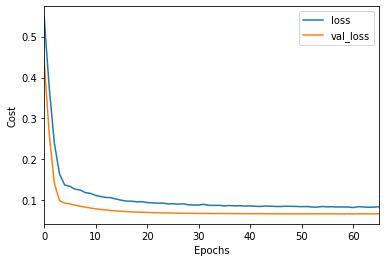

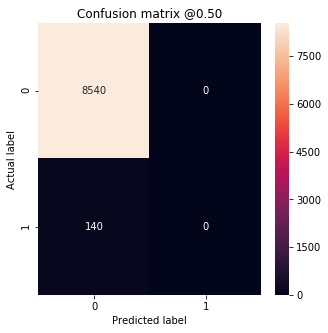

In [40]:
create_model('simple', {0:1, 1:1})

Weight for class 0: 0.51
Weight for class 1: 27.71
Train on 34720 samples, validate on 8680 samples
Epoch 1/200
34720/34720 [==============================] - 6s 178us/sample - loss: 0.6985 - tp: 350.0000 - fp: 16818.0000 - tn: 17259.0000 - fn: 293.0000 - accuracy: 0.5072 - precision: 0.0204 - recall: 0.5443 - auc: 0.5456 - val_loss: 0.6378 - val_tp: 124.0000 - val_fp: 5956.0000 - val_tn: 2584.0000 - val_fn: 16.0000 - val_accuracy: 0.3120 - val_precision: 0.0204 - val_recall: 0.8857 - val_auc: 0.7433
Epoch 2/200
34720/34720 [==============================] - 0s 9us/sample - loss: 0.6821 - tp: 466.0000 - fp: 19554.0000 - tn: 14523.0000 - fn: 177.0000 - accuracy: 0.4317 - precision: 0.0233 - recall: 0.7247 - auc: 0.6274 - val_loss: 0.6252 - val_tp: 129.0000 - val_fp: 5667.0000 - val_tn: 2873.0000 - val_fn: 11.0000 - val_accuracy: 0.3459 - val_precision: 0.0223 - val_recall: 0.9214 - val_auc: 0.7840
Epoch 3/200
34720/34720 [==============================] - 0s 10us/sample - loss: 0.6687 -

Epoch 21/200
34720/34720 [==============================] - 1s 15us/sample - loss: 0.5313 - tp: 517.0000 - fp: 11346.0000 - tn: 22731.0000 - fn: 126.0000 - accuracy: 0.6696 - precision: 0.0436 - recall: 0.8040 - auc: 0.8110 - val_loss: 0.4469 - val_tp: 119.0000 - val_fp: 2710.0000 - val_tn: 5830.0000 - val_fn: 21.0000 - val_accuracy: 0.6854 - val_precision: 0.0421 - val_recall: 0.8500 - val_auc: 0.8545
Epoch 22/200
34720/34720 [==============================] - 0s 11us/sample - loss: 0.5286 - tp: 533.0000 - fp: 11505.0000 - tn: 22572.0000 - fn: 110.0000 - accuracy: 0.6655 - precision: 0.0443 - recall: 0.8289 - auc: 0.8118 - val_loss: 0.4487 - val_tp: 121.0000 - val_fp: 2891.0000 - val_tn: 5649.0000 - val_fn: 19.0000 - val_accuracy: 0.6647 - val_precision: 0.0402 - val_recall: 0.8643 - val_auc: 0.8564
Epoch 23/200
34720/34720 [==============================] - 0s 10us/sample - loss: 0.5364 - tp: 537.0000 - fp: 11732.0000 - tn: 22345.0000 - fn: 106.0000 - accuracy: 0.6590 - precision: 0.

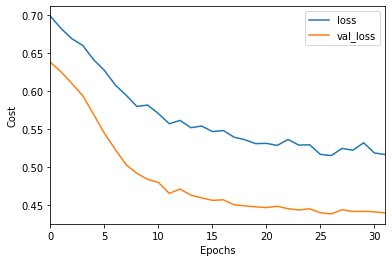

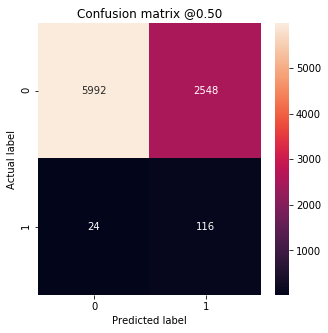

In [41]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0
class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
create_model('weighted', class_weight)

In [42]:
 help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [43]:
# from tensorboard.plugins.hparams import api as hp
# HP_NUM_UNITS_L1 = hp.HParam('num_units_l1', hp.Discrete([16, 32]))
# HP_NUM_UNITS_L2 = hp.HParam('num_units_l2', hp.Discrete([8,4]))
# HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
# HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

# METRIC_ACCURACY = 'accuracy'

# with tf.summary.create_file_writer('logs\\hparam_tuning').as_default():
#     hp.hparams_config(
#         hparams=[HP_NUM_UNITS_L1,HP_NUM_UNITS_L2, HP_DROPOUT, HP_OPTIMIZER],
#         metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
#   )

# def train_test_model(hparams):
#     model = Sequential()
#     # input layer
#     model.add(Dense(hparams[HP_NUM_UNITS_L1],  activation='relu'))
#     model.add(Dropout(hparams[HP_DROPOUT]))

#     # hidden layer
#     model.add(Dense(hparams[HP_NUM_UNITS_L2], activation='relu'))
#     model.add(Dropout(hparams[HP_DROPOUT]))
    
#     model.add(Dense(8, activation='relu'))
#     model.add(Dropout(hparams[HP_DROPOUT]))
#     # output layer
#     model.add(Dense(units=1,activation='sigmoid'))

#     # Compile model
#     model.compile(loss='binary_crossentropy', optimizer=hparams[HP_OPTIMIZER],  metrics=['accuracy'])
    
#     model.fit(x=X_train, 
#           y=y_train, 
#           epochs=400,
#           validation_data=(X_test, y_test), 
#           verbose=1,
#           callbacks = [early_stop,
#                        tf.keras.callbacks.TensorBoard(logdir),  # log metrics
#                         hp.KerasCallback(logdir, hparams)]
#           )
    
#     _, accuracy = model.evaluate(X_test, y_test)
    
#     return accuracy

# def run(run_dir, hparams):
#     with tf.summary.create_file_writer(run_dir).as_default():
#         hp.hparams(hparams)  # record the values used in this trial
#         accuracy = train_test_model(hparams)
#         tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

# session_num = 0

# for num_units_l1 in HP_NUM_UNITS_L1.domain.values:
#     for num_units_l2 in HP_NUM_UNITS_L2.domain.values:
#         for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
#             for optimizer in HP_OPTIMIZER.domain.values:
#               hparams = {
#                   HP_NUM_UNITS_L1: num_units_l1,
#                   HP_NUM_UNITS_L2: num_units_l2,
#                   HP_DROPOUT: dropout_rate,
#                   HP_OPTIMIZER: optimizer,
#               }
#               run_name = "run-%d" % session_num
#               print('--- Starting trial: %s' % run_name)
#               print({h.name: hparams[h] for h in hparams})
#               run('logs\\hparam_tuning' + run_name, hparams)
#               session_num += 1

NameError: name 'model' is not defined

In [ ]:

predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

In [ ]:
# part of this code is taken from https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.ylim(2, 0)
  print('True Negatives: ', cm[0][0])
  print('False Positives: ', cm[0][1])
  print('False Negatives: ', cm[1][0])
  print('True Positives: ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))
plot_cm(y_test,predictions)    

In [ ]:
roc_curve(y_test,predictions)

In [ ]:
len(predictions)

In [ ]:
row = 300
patient = df.drop('stroke', axis = 1).iloc[row]
patient

In [ ]:
patient = scaler.transform(patient.values.reshape(1,13))
patient

In [ ]:
model.predict_classes(patient)[0][0]

In [ ]:
for row in range (0,10):
    patient = df.drop('stroke', axis = 1).iloc[row]
    patient = scaler.transform(patient.values.reshape(1,13))
    prediction = (model.predict_classes(patient))[0][0]
    print ("Predicted:{} Actual:{}".format(prediction,df.iloc[row]['stroke']))